# Pandas II - working with data

Last time, we met some of the basic data structures in pandas.

Basic pandas objects:

* Index
* Series
* Data Frame

We also learned how these three things are related. Namely, we can think of a pandas `DataFrame` as being composed of several *named columns*, each of which is like a `Series`, and a special `Index` column along the left-hand side.

In this tutorial, we'll learn about 
* some common methods that pandas objects have – the "verbs" that make them do useful things
* accessing row/column subsets fo data
* working with grouped data: aggregation and pivot tables

## Make a data frame to play with

Let's build a little data frame and take look at it to remind ourselves of this structure. We'll build one similar to a data frame we played with last time.

It will have 5 columns co

First, import `pandas` because of course, and `numpy` in order to simulate some data.

In [2]:
import pandas as pd    
import numpy as np     # to make some simulated data

Now we can make the data frame. It will have 4 variables of cardiovascular data for a number of patients that we can specify. Because a pandas `DataFrame` has that special index column, we'll just use it to correspond to "patient ID" instead of making a fifth variable.

In [3]:
num_patients = 10    # specify the number of patients

# make some simulated data 
sys_bp = np.int64(125 + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80 + 5*np.random.randn(num_patients,))
b_oxy = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse = np.int64(65 + 2*np.random.randn(num_patients,))

# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diastolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse
           }
    
our_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

And now lets look at it.

In [4]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
0,129,87,98.77,63
1,121,77,98.48,65
2,124,86,98.32,65
3,114,80,98.82,63
4,126,78,98.49,66
5,120,90,98.56,63
6,118,79,98.48,64
7,125,74,98.30,62
8,132,87,98.62,67
9,119,78,98.92,66


Now we can see the nice structure of the `DataFrame` object. We have four columns corresponding to our measurement variables, and each row is an "observation" which, in the case, corresponds to an individual patient.

To appreciate some of the features of a pandas `DataFrame`, let's compare it with a numpy `Array` holding the same information. (Which we can do because we're only dealing with numbers here - one of the main features of a pandas data frame is that it can hold non-numeric information too).

In [5]:
our_array = np.transpose(np.vstack((sys_bp, dia_bp, b_oxy, pulse)))
our_array

array([[129.  ,  87.  ,  98.77,  63.  ],
       [121.  ,  77.  ,  98.48,  65.  ],
       [124.  ,  86.  ,  98.32,  65.  ],
       [114.  ,  80.  ,  98.82,  63.  ],
       [126.  ,  78.  ,  98.49,  66.  ],
       [120.  ,  90.  ,  98.56,  63.  ],
       [118.  ,  79.  ,  98.48,  64.  ],
       [125.  ,  74.  ,  98.3 ,  62.  ],
       [132.  ,  87.  ,  98.62,  67.  ],
       [119.  ,  78.  ,  98.92,  66.  ]])

We can see here that our array, `our_array`, contains exactly the same information as our dataframe, `our_df`. There are 3 main differences between the two:

* they have different verbs – things they know how to do 
* we have more ways to access the information in a data frame
* the data frame could contain non-numeric information (e.g. gender) if we wanted

(Also notice that the data frame is just prettier when printed than the numpy array)

## Verbs

Let's look at some verbs. Intuitively, it seems like the should both know how to take a mean. Let's see.

In [6]:
our_array.mean()

91.844

So the numpy array does indeed know how to take the mean of itself, but it takes the mean of the entire array by default, which is not very useful in this case. If we want the mean of each variable, we have to specify that we want the means of the columns (i.e. row-wise means).

In [7]:
our_array.mean(axis=0)

array([122.8  ,  81.6  ,  98.576,  64.4  ])

But look what happens if we ask for the mean of our data frame:

In [8]:
our_df.mean()

systolic BP          122.800
diastolic BP          81.600
blood oxygenation     98.576
pulse rate            64.400
dtype: float64

Visually, that is much more useful! We have the mean of each of our variables, nicely labled by the variable name.

Data frames can also `describe()` themselves.

In [9]:
our_df.describe()

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.800000,81.600000,98.576000,64.400000
std,5.432413,5.399588,0.206892,1.646545
min,114.000000,74.000000,98.300000,62.000000
25%,119.250000,78.000000,98.480000,63.000000
50%,122.500000,79.500000,98.525000,64.500000
75%,125.750000,86.750000,98.732500,65.750000
max,132.000000,90.000000,98.920000,67.000000


Gives us a nice summary table of the data in our data frame.

Numpy arrays don't know how to do this.

In [10]:
our_array.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

Data frames can also make histograms and boxplots of themselves. They aren't publication quality, but super useful for getting a feel for our data.

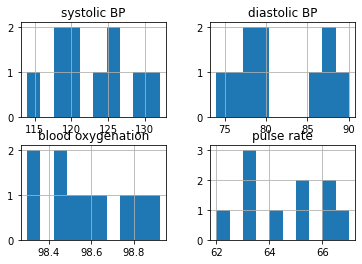

In [11]:
our_df.hist();

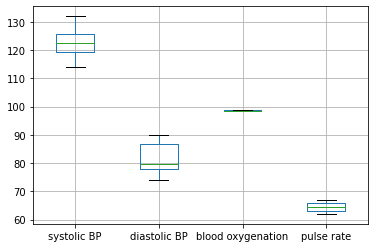

In [12]:
our_df.boxplot();

For a complete listing of what our data frame knows how to do, we can type `our_df.` and then hit the tab key.

In [13]:
our_df.

SyntaxError: invalid syntax (1899272014.py, line 1)

Let's return to the `mean()` function, and see what, exactly, it is returning. We can do this by assigning the output to a variable and looking at its type.

In [14]:
our_means = our_df.mean()
our_means

systolic BP          122.800
diastolic BP          81.600
blood oxygenation     98.576
pulse rate            64.400
dtype: float64

In [15]:
type(our_means)

pandas.core.series.Series

So it is a pandas series, but, rather than the index being 0, 1, 2, 3, the *index values are actually the names of our variables*. 

If we want the mean pulse rate, *we can actually ask for it by name!*

In [16]:
our_means['pulse rate']

64.4

This introduces another key feature of pandas: **you can access data by name**.

## Accessing data

Accessing data by name is kind of a big deal. It makes code more readable and faster and easier to write.

So, for example, let's say we wanted the mean pulse rate for our patients. Using numpy, we would have to remember or figure our which column of our numpy array was pulse rate. And we'd have to remember that Python indexes start at 0. *And* we'd have to remember that we have to tell numpy to take the mean down the columns explicitly. Ha. 

So our code might look something like...

In [17]:
np_style_means = our_array.mean(axis=0)
pulse_mean = np_style_means[3]
pulse_mean

64.4

Compare that to doing it the pandas way:

In [18]:
our_means = our_df.mean()
our_means['pulse rate']

64.4

The pandas way makes it very clear what we are doing! People like things to have names and, in pandas, things have names.

### Accessing data using square brackets

Let's look ot our litte data frame again.

In [19]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
0,129,87,98.77,63
1,121,77,98.48,65
2,124,86,98.32,65
3,114,80,98.82,63
4,126,78,98.49,66
5,120,90,98.56,63
6,118,79,98.48,64
7,125,74,98.30,62
8,132,87,98.62,67
9,119,78,98.92,66


We can grab a column (variable) by name if we want:

In [20]:
our_df['pulse rate']

0    63
1    65
2    65
3    63
4    66
5    63
6    64
7    62
8    67
9    66
Name: pulse rate, dtype: int64

Doing this creates another `DataFrame` (or `Series`), so it knows how to do stuff to. This allows us to do things like, for example, compute the mean pulse rate in one step instead of two. Like this:

In [21]:
our_df['pulse rate'].mean()   # creates a series, then makes it compute its own mean

64.4

We can grab as many columns as we want by using a list of column names.

In [22]:
needed_cols = ['diastolic BP', 'systolic BP']   # make a list
our_df[needed_cols]                             # use the list to grab columns

,diastolic BP,systolic BP
0,87,129
1,77,121
2,86,124
3,80,114
4,78,126
5,90,120
6,79,118
7,74,125
8,87,132
9,78,119


We could also do this in one step.

In [23]:
our_df[['diastolic BP', 'systolic BP']]  # the inner brackets define our list

,diastolic BP,systolic BP
0,87,129
1,77,121
2,86,124
3,80,114
4,78,126
5,90,120
6,79,118
7,74,125
8,87,132
9,78,119


 (although the double brackets might look a little confusing at first)

### Getting row and row/column combinations of data: "indexing"

**Terminology Warning!** "Indexing" is a general term which means "accessing data by location". In pandas, as we have seen, objects like DataFrames also have an "index" which is a special column of row identifiers. So, in pandas, we can index data using column names, row names (indexing using the index), or both. (We can also index into pandas data frames as if they were numpy arrays, which sometimes comes in handy.)

#### Changing the index to make (row) indexing more intuitive

Speaking of indexes, it's a little weird to have our patient IDs start at "0". Both because "patient zero" has a special meaning and also because it's just not intuitive to number a sequence of actual things starting at "0".

Fortunately, pandas `DataFrame` (and `Series`) objects allow you to customize their index column fairly easily.

Let's set the index to start at 1 rather than 0:

In [24]:
my_ind = np.linspace(1, 10, 10)  # make a sequence from 1 to 10
my_ind = np.int64(my_ind)        # change it from decimal to integer (not really necessary, but...)
our_df.index = my_ind

In [25]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
1,129,87,98.77,63
2,121,77,98.48,65
3,124,86,98.32,65
4,114,80,98.82,63
5,126,78,98.49,66
6,120,90,98.56,63
7,118,79,98.48,64
8,125,74,98.30,62
9,132,87,98.62,67
10,119,78,98.92,66


### Accessing data using `pd.DataFrame.loc[]`

In the section above, we saw that you can get columns of data our of a data frame using square brackets `[]`. Pandas data frames also know how to give you subsets of rows or row/column combinations.  

The primary method for accessing specific bits of data from a pandas data frame is with the `loc[]` verb. It provides an easy way to get rows of data based upon the index column. In other words, `loc[]` is the way we use the data frame index as an index!

So this will give us the data for patient number 3:

In [26]:
our_df.loc[3]

systolic BP          124.00
diastolic BP          86.00
blood oxygenation     98.32
pulse rate            65.00
Name: 3, dtype: float64

**Note!** The above call did **not** behave like a Python or numpy index! If it had, we would have gotten the data for patient number 4 because Python and numpy use *zero based indexing*. 

But using the `loc[]` function gives us back the row "named" 3. We literally get what we asked for! Yay!

We can also *slice* out rows in chunks:

In [27]:
our_df.loc[3:6]

,systolic BP,diastolic BP,blood oxygenation,pulse rate
3,124,86,98.32,65
4,114,80,98.82,63
5,126,78,98.49,66
6,120,90,98.56,63


Which, again, gives us what we asked for without having to worry about the zero-based business.

But `.loc[]` also allows us to get specfic columns too. Like:

In [28]:
our_df.loc[3:6, 'blood oxygenation']

3    98.32
4    98.82
5    98.49
6    98.56
Name: blood oxygenation, dtype: float64

For a single column, or:

In [29]:
our_df.loc[3:6,'systolic BP':'blood oxygenation']

,systolic BP,diastolic BP,blood oxygenation
3,124,86,98.32
4,114,80,98.82
5,126,78,98.49
6,120,90,98.56


for multiple columns.

In summary, there are 3 main ways to get chunks of data out of a data frame "by name".

* square brackets (only) gives us columns, e.g. `our_df['systolic BP']`
* `loc[]` with one argument gives us rows, e.g. `our_df.loc[3]`
* `loc[]` with two arguments gives us row-column combinations, e.g. `our_df.loc[3,'systolic BP']`

Additionally, with `loc[]`, we can specify index ranges for the rows or columns or both, e.g. `new_df.loc[3:6,'systolic BP':'blood oxygenation']`

One final thing about using `loc[]` is that the index column in a `DataFrame` doesn't have to be numbers. It can be date/time strings (as we'll see next time), or just plain strings (as we've seen above with `Series` objects).

Let's look at a summary of our data using the `describe()` method:

In [30]:
our_sum = our_df.describe()
our_sum

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.800000,81.600000,98.576000,64.400000
std,5.432413,5.399588,0.206892,1.646545
min,114.000000,74.000000,98.300000,62.000000
25%,119.250000,78.000000,98.480000,63.000000
50%,122.500000,79.500000,98.525000,64.500000
75%,125.750000,86.750000,98.732500,65.750000
max,132.000000,90.000000,98.920000,67.000000


This looks suspiciously like a data frame except the index column looks like they're... er... not indexes. Let's see.

In [31]:
type(our_sum)

pandas.core.frame.DataFrame

Yep, it's a data frame! But let's see if that index column actually works:

In [32]:
our_sum.loc['mean']

systolic BP          122.800
diastolic BP          81.600
blood oxygenation     98.576
pulse rate            64.400
Name: mean, dtype: float64

Note that, with a `Series` object, we use square brackets (only) to get  rows. With a `DataFrame`, square brackets (only) are used to get columns. It won't work for `DataFrame` objects:

In [33]:
our_sum['mean']

KeyError: 'mean'

So, with a `DataFrame`, we have to use `.loc[]` to get rows.

And now we can slice out (get a range of) rows:

In [34]:
our_sum.loc['count':'std']

,systolic BP,diastolic BP,blood oxygenation,pulse rate
count,10.000000,10.000000,10.000000,10.000000
mean,122.800000,81.600000,98.576000,64.400000
std,5.432413,5.399588,0.206892,1.646545


Or rows and columns:

In [35]:
our_sum.loc['count':'std', 'systolic BP':'diastolic BP']

,systolic BP,diastolic BP
count,10.000000,10.000000
mean,122.800000,81.600000
std,5.432413,5.399588


### Accessing data using pd.DataFrame.iloc[]

Occasionally, you might want to treat a pandas `DataFrame` as a numpy `Array` and index into it using the *implicit* row and column indexes (which start as zero of course). So support this, pandas `DataFrame` objects also have an `iloc[]`.

Let's look at our data frame again:

In [36]:
our_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate
1,129,87,98.77,63
2,121,77,98.48,65
3,124,86,98.32,65
4,114,80,98.82,63
5,126,78,98.49,66
6,120,90,98.56,63
7,118,79,98.48,64
8,125,74,98.30,62
9,132,87,98.62,67
10,119,78,98.92,66


And let's check its shape:

In [37]:
our_df.shape

(10, 4)

At some level, then, Python considers this to be just a 10x4 array (like a numpy array). This is were `iloc[]` comes in; `iloc[]` will treat the data frame as though it were a numpy array – no names!

So let's index into `our–df` using `iloc[]`:

In [38]:
our_df.iloc[3]  # get the fourth row

systolic BP          114.00
diastolic BP          80.00
blood oxygenation     98.82
pulse rate            63.00
Name: 4, dtype: float64

And compare that to using `loc[]`:

In [39]:
our_df.loc[3]

systolic BP          124.00
diastolic BP          86.00
blood oxygenation     98.32
pulse rate            65.00
Name: 3, dtype: float64

And of course you can slice out rows and columns:

In [40]:
our_df.iloc[2:5, 0:2]

,systolic BP,diastolic BP
3,124,86
4,114,80
5,126,78


Indexing using `iloc[]` is rarely needed on regular data frames (if you're using it, you should probably be working with a numpy `Array`).

It is, however, very handy for pulling data out of summary data tables (see below).

## Non-numerical information (categories or factors)

One of the huge benefits of pandas objects is that, unlike numpy arrays, they can contain categorical variables.

### Make another data frame to play with

Let's use tools we've learned to make a data frame that has both numerical and categorical variables.

First, we'll make the numerical data:

In [41]:
num_patients = 20    # specify the number of patients

# make some simulated data with realistic numbers.
sys_bp = np.int64(125 + 5*np.random.randn(num_patients,))
dia_bp = np.int64(80 + 5*np.random.randn(num_patients,))
b_oxy = np.round(98.5 + 0.3*np.random.randn(num_patients,), 2)
pulse = np.int64(65 + 2*np.random.randn(num_patients,))


(Now we'll make them interesting – this will be clear later)

In [42]:
sys_bp[0:10] = sys_bp[0:10] + 15
dia_bp[0:10] = dia_bp[0:10] + 15
sys_bp[0:5] = sys_bp[0:5] + 5
dia_bp[0:5] = dia_bp[0:5] + 5
sys_bp[10:15] = sys_bp[10:15] + 5
dia_bp[10:15] = dia_bp[10:15] + 5

Now let's make a categorical variable indicating whether the patient is diabetic or not. We'll make the first half be diabetic.

In [43]:
diabetic = pd.Series(['yes', 'no'])  # make the short series
diabetic = diabetic.repeat(num_patients/2)       # repeat each over two cell's worth of data
diabetic = diabetic.reset_index(drop=True)      # reset the series's index value

Now will make an "inner" gender variable.

In [44]:
gender = pd.Series(['male', 'female'])             # make the short series
gender = gender.repeat(num_patients/4)                 # repeat each over one cell's worth of data
gender = pd.concat([gender]*2, ignore_index=True)   # stack or "concatenate" two copies

Now we'll make a dictionary containing all our data.

In [45]:
# Make a dictionary with a "key" for each variable name, and 
# the "values" being the num_patients long data vectors
df_dict = {'systolic BP' : sys_bp,
           'diastolic BP' : dia_bp,
           'blood oxygenation' : b_oxy,
           'pulse rate' : pulse,
           'gender': gender,
           'diabetes': diabetic
           }
    

And turn it into a data frame.

In [46]:
new_df = pd.DataFrame(df_dict)    # Now make a data frame out of the dictionary

Finally, let's up our game and make a more descriptive index column!

In [47]:
basename = 'patient '                      # make a "base" row name
my_index = []                             # make an empty list
for i in range(1, num_patients+1) :       # use a for loop to add
    my_index.append(basename + str(i))     # id numbers so the base name

Assign our new row names to the index of our data frame.

In [48]:
new_df.index = my_index

Let's look at our creation!

In [49]:
new_df

,systolic BP,diastolic BP,blood oxygenation,pulse rate,gender,diabetes
patient 1,140,100,98.32,67,male,yes
patient 2,148,101,98.41,65,male,yes
patient 3,153,110,98.53,65,male,yes
patient 4,144,104,98.51,64,male,yes
patient 5,155,107,98.47,63,male,yes
patient 6,151,101,98.91,68,female,yes
patient 7,131,100,98.25,63,female,yes
patient 8,130,93,98.62,65,female,yes
patient 9,146,94,98.46,66,female,yes
patient 10,144,87,98.44,63,female,yes


### Looking at our data

Another really nice thing about pandas `DataFrames` is that they naturally lend themselves to interogation via Seaborn. So let's peek at some stuff.

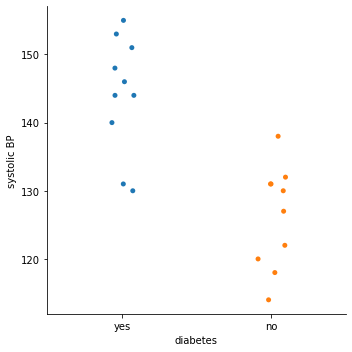

In [50]:
import seaborn as sns

sns.catplot(data=new_df, x='diabetes', y='systolic BP');

Okay, now let's go crazy and do a bunch of plots.

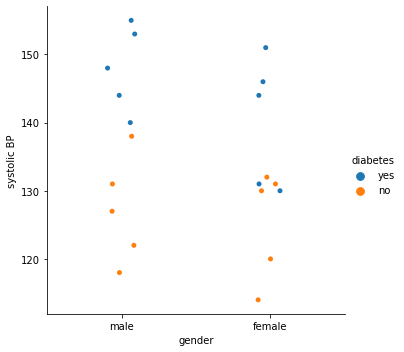

In [51]:
sns.catplot(data=new_df, x='gender', y='systolic BP', hue='diabetes');

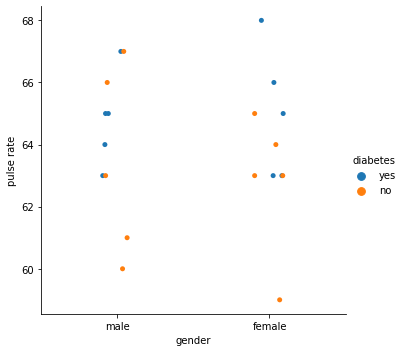

In [52]:
sns.catplot(data=new_df, x='gender', y='pulse rate', hue='diabetes');

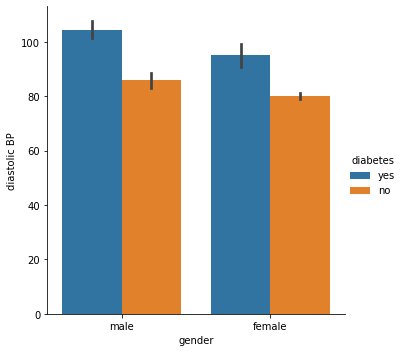

In [53]:
sns.catplot(data=new_df, x='gender', y='diastolic BP', hue='diabetes', kind='bar');

### Computing within groups

Now that we have an idea of what's going on, let's look at how we could go about computing things like the mean systolic blood pressure in females vs. males, etc.

#### Using the `groupby()` method

Data frames all have a `group_by()` method that, as the name implies, will group our data by a categorical variable. Let's try it.

In [54]:
new_df.groupby('gender')

So this gave us a `DataFrameGroupBy` object which, in and of itself, is very useful. However, *it knows how to do things*!

In general, `GroupBy` objects know how to do pretty much anything that regular `DataFrame` objects do. So, if we want the mean by gender, we can ask the `GroupBy` (for short) object to give us the mean:

In [55]:
new_df.groupby('gender').mean()

,systolic BP,diastolic BP,blood oxygenation,pulse rate
gender,,,,
female,132.9,87.5,98.464,63.9
male,137.6,95.1,98.500,64.1


#### Using the `groupby()` followed by `aggregate()`

More powerfully, we can use a `GroupBy` object's `aggregate()` method to compute many things at once.

In [56]:
new_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])

/var/folders/w6/hzgmtvzj5v77wvm2wyhg_kvr0000gn/T/ipykernel_18010/2935691488.py:1: FutureWarning: ['gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  new_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])


systolic BP                     diastolic BP                     \
                mean       std  min  max         mean       std min  max   
diabetes                                                                   
no             126.3  7.498889  114  138         82.9  4.040077  78   91   
yes            144.2  8.508819  130  155         99.7  6.832114  87  110   

         blood oxygenation                         pulse rate                \
                      mean       std    min    max       mean       std min   
diabetes                                                                      
no                  98.472  0.291654  97.87  98.81       63.1  2.558211  59   
yes                 98.492  0.180111  98.25  98.91       64.9  1.728840  63   

              
         max  
diabetes      
no        67  
yes       68

Okay, what's going on here? First, we got a lot of information out. Second, we got a warning because pandas couldn't compute the mean, etc., on the gender variable, which is perfectly reasonable of course.

We can handle this by using our skills to carve out a subset of our data frame – just the columns of interest – and then use `groupby()` and `aggregate()` on that.

In [57]:
temp_df = new_df[['systolic BP', 'diastolic BP', 'diabetes']]        # make a data frame with only the columns we want
our_summary = temp_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])     # compute stuff on those columns
our_summary

systolic BP                     diastolic BP                   
                mean       std  min  max         mean       std min  max
diabetes                                                                
no             126.3  7.498889  114  138         82.9  4.040077  78   91
yes            144.2  8.508819  130  155         99.7  6.832114  87  110

Notice here that there are *groups of columns*. Like there are two "meta-columns", each with four data columns in them. This makes getting the actual values out of the table for further computation, etc., kind of a pain. It's called "multi-indexing" or "hierarchical indexing". It's a pain.

Here are a couple examples.

In [58]:
our_summary[("systolic BP", "mean")]

diabetes
no     126.3
yes    144.2
Name: (systolic BP, mean), dtype: float64

In [59]:
our_summary.loc[("no")]

systolic BP   mean    126.300000
              std       7.498889
              min     114.000000
              max     138.000000
diastolic BP  mean     82.900000
              std       4.040077
              min      78.000000
              max      91.000000
Name: no, dtype: float64

Of course, we could do the blood pressure variables separately and store them for later plotting, etc.

In [60]:
temp_df = new_df[['systolic BP', 'diabetes']]        # make a data frame with only the columns we want
our_summary = temp_df.groupby('diabetes').aggregate(['mean', 'std', 'min', 'max'])     # compute stuff on those columns
our_summary

systolic BP                    
                mean       std  min  max
diabetes                                
no             126.3  7.498889  114  138
yes            144.2  8.508819  130  155

But we still have a meta-column label!

Here's were `.iloc[]` comes to the rescue!

If we look at the shape of the summary:

In [61]:
our_summary.shape

(2, 4)

We see that, ultimately, the data is just a 2x4 table. So if we want, say, the standard deviation of non-diabetics, we can just do:

In [62]:
our_summary.iloc[0, 1]

7.498888806572166

And we get back a pure number.

We can also do things "backwards", that is, instead of subsetting the data and then doing a `groupby()`, we can do the `groupby()` and then index into it and compute what we want. For example, if we wanted the mean of systolic blood pressure grouped by whether patients had diabetes or not, we could go one of two ways.

We could subset and then group:

In [63]:
new_df[['systolic BP', 'diabetes']].groupby('diabetes').mean()

,systolic BP
diabetes,
no,126.3
yes,144.2


Or we could group and then subset:

In [64]:
new_df.groupby('diabetes')[['systolic BP']].mean()

,systolic BP
diabetes,
no,126.3
yes,144.2


Okay, first, it's cool that there are multiple ways to do things. Second – **aarrgghh!** – things are starting to get complicated and code is getting hard to read!

#### Using pivot tables

"Pivot tables" (so named because allow you to look at data along different dimensions or directions) provide a handy solution for summarizing data.

By default, pivot tables tabulate the mean of data. So if we wish to compute the average systolic blood pressure broken out by diabetes status, all we have to do is:

In [65]:
new_df.pivot_table('systolic BP', index='diabetes')

,systolic BP
diabetes,
no,126.3
yes,144.2


Here, `index` is used in the "row names" sense of the word.

We can also have another grouping variables map to the columns of the output if we wish:

In [66]:
new_df.pivot_table('systolic BP', index='diabetes', columns='gender')

gender,female,male
diabetes,,
no,125.4,127.2
yes,140.4,148.0


Finally, we can specify pretty much any other summary function we want to "aggregate" by:

In [67]:
new_df.pivot_table('systolic BP', index='diabetes', columns='gender', aggfunc='median')

gender,female,male
diabetes,,
no,130,127
yes,144,148


If you want to customize the column names using the aggregate function, you can (Though it is somewhat limited)! Look at the example down below for an explanation

In [68]:
new_df.groupby('diabetes').aggregate(Mean=('systolic BP',"mean"))

,Mean
diabetes,
no,126.3
yes,144.2


The "Mean" is your new title, while inside the second set of parantheses is where/what you wantthe aggregate function to calculate

However, as you might have noticed, this is fairly limited. It removes the meta column titles, replacing them with the title of your choice. This can make it somewhat dificult to interpret your tables. Additionally, you can't have any spaces in the new title of your choice. 

In [69]:
 new_df.groupby('diabetes').aggregate(Mean=('systolic BP',"mean"),
                                      Standard_Deviation = ('systolic BP',"std"))

,Mean,Standard_Deviation
diabetes,,
no,126.3,7.498889
yes,144.2,8.508819


## vs.

In [70]:
new_df.groupby('diabetes').aggregate(
    Mean=('systolic BP',"mean"), 
    Standard Deviation = ('systolic BP',"std"))

SyntaxError: positional argument follows keyword argument (3508710705.py, line 3)

(Where `aggfunc` can me 'min', 'sum', 'std', etc., etc.)

## Summary

In this tutorial, we have covered some key aspects of working with data using pandas data frames. These were:

* doing things with data using the methods – the verbs – of pandas objects
* accessing subsets of the data with 
     - square brackets
     - the `.loc[]` method
     - the `.iloc[]` method
* assembling data frames and customizing the index
* grouping data and computing summaries using
     - `groupby()` and `aggregate()`
     - pivot tables

## Exercise

Let's do the following on our own

1. Make a data frame that has
    * one categorical variable, "bilingual", that splits the data in half ("yes" and "no")
    * two numerical variables, verbal GRE and quant GRE 
    * (you can build in, or not, whatever effect of bilingual you wish)
    * (GRE scores have a mean of about 151 and a std. dev. of about 8.5)
2. Set the index to be "Student 1", "Student 2", etc.
3. Do a seaborn plot of verbal GRE vs. bilinguality (is that a word?)
4. Make another one of quant GRE vs. bilingual status
5. Compute the mean and standard *error* of each score separated by bilingual status (using any method you wish!)

In [78]:

num_stu = 15
bilingual = pd.Series(['yes', 'no'])
bilingual = bilingual.repeat(num_stu/2)
bilingual = bilingual.reset_index(drop=True)
v_gre = np.int64(145 + 8*np.random.randn(num_stu,))
q_gre = np.int64(150 + 7*np.random.randn(num_stu,))
df_dict = {'Bilingual:' : bilingual,
'Verbal GRE:' : v_gre,
'Quant Gre:' : q_gre}

our_df = pd.DataFrame(df_dict)

ind_dict = {'Student 1' : 0,
'Student 2' : 1,
'Student 3' : 2,
'Student 4' : 3,
'Student 5' : 4,
'Student 6' : 5,
'Student 7' : 6,
'Student 8' : 7,
'Student 9' : 8,
'Student 10' : 9}

our_df.index = ind_dict
print(our_df)

ValueError: array length 15 does not match index length 14